In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import sklearn.linear_model as lm
import scipy

In [5]:
# Załadowanie danych
data = pd.read_csv('train.csv')
data_train = data.iloc[:1000,:]
data_test = data.iloc[1000:,:]

In [6]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0, 0.5, 'SalePrice')

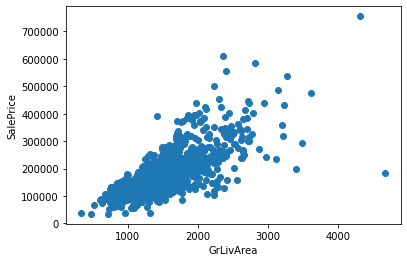

In [7]:
# Przykładowe wykresy zależności ceny od innych cech
plt.plot(data_train['GrLivArea'],data_train['SalePrice'],'o')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

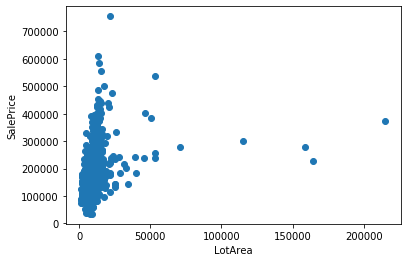

In [40]:
plt.plot(data_train['LotArea'],data_train['SalePrice'],'o')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

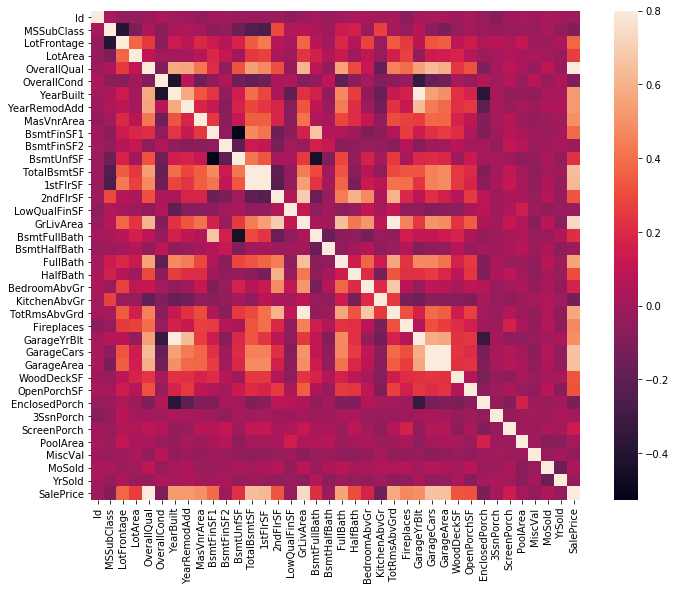

In [9]:
#Wykres macierzu koreclacji 
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

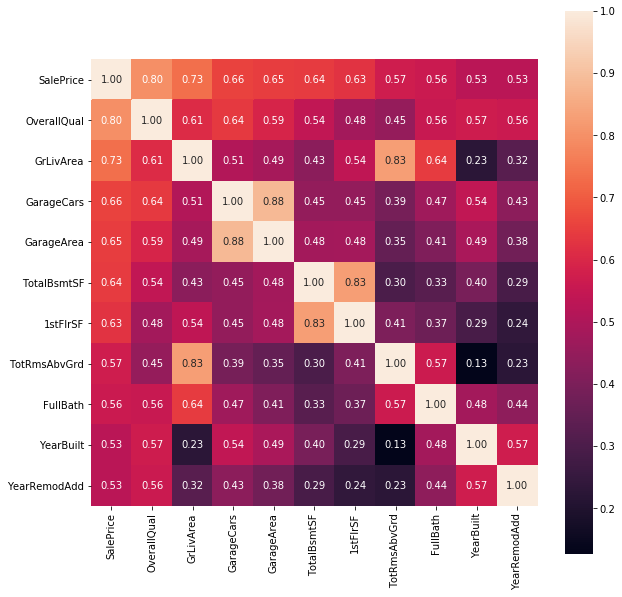

In [10]:
# Heatmapa 10 cech najbardziej skorelowanych z ceną
k = 11 # 11 bo to uwzględnia też samą cenę 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

D:\Programy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


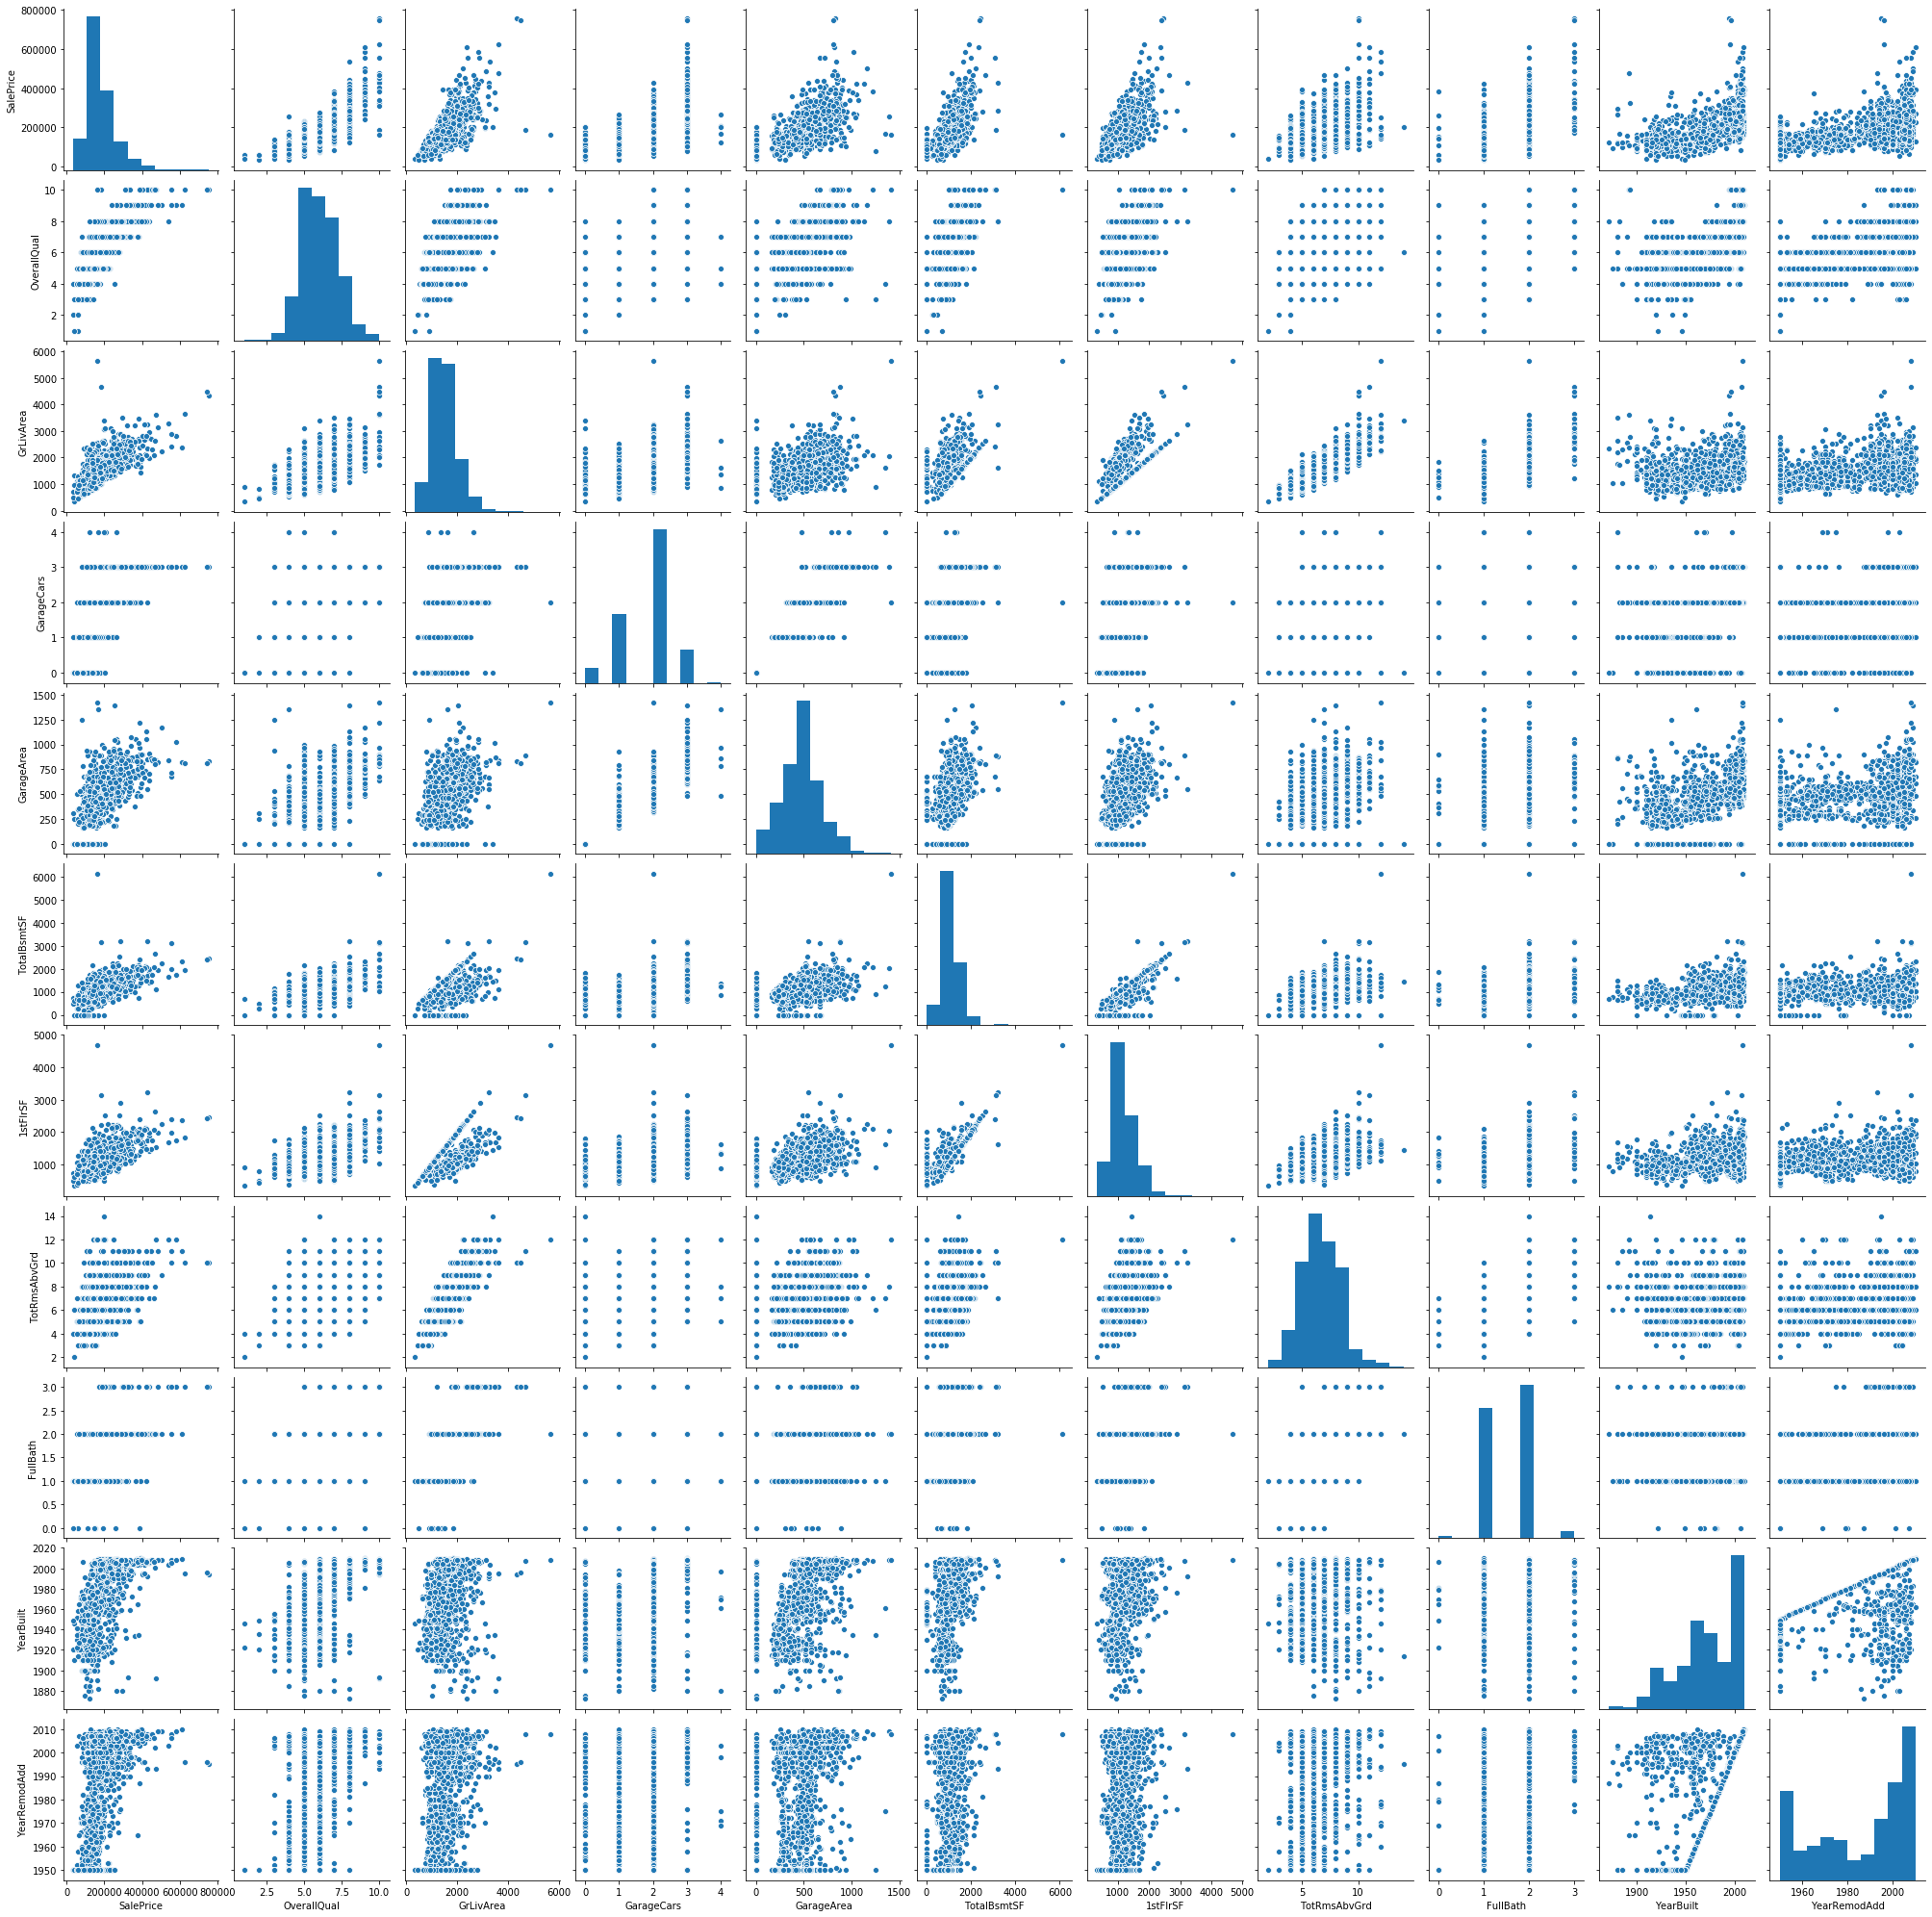

In [12]:
# Pairplot 10 najbardziej skorelowanych z ceną cech
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [13]:
# Wybranie wyłącznie tych 10 cech
final_data = data_train[cols]
final_data = final_data.dropna()()
np.any(final_data.isnull())

False

In [38]:
final_data

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,FullBath,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,8,2,2003,2003
1,181500,6,1262,2,460,1262,1262,6,2,1976,1976
2,223500,7,1786,2,608,920,920,6,2,2001,2002
3,140000,7,1717,3,642,756,961,7,1,1915,1970
4,250000,8,2198,3,836,1145,1145,9,2,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
995,121600,4,1230,1,305,747,774,5,1,1946,1950
996,136500,5,1050,1,368,1050,1050,6,1,1961,1961
997,185000,6,1442,2,615,1442,1442,6,2,1970,1970
998,91000,3,1077,1,210,1007,1077,6,1,1922,1950


Uzupełnij kod, tak aby otrzymać parametry modelu

In [23]:
x = np.array(final_data.iloc[:,1:]) # zmienna objaśniająca
y = final_data.iloc[:,0]  # zmienna objaśniana
M1 = np.column_stack( (np.ones_like(x[:,0]), x) ) 
p1 = np.linalg.lstsq(M1, y, rcond=None) # least-squares solution to a linear matrix equation

Napisz funkcję, która będzie obliczała wartość ceny mieszkania na postawie wyliczonych parametrów

In [24]:
f_lr_1 = lambda x: np.sum(p1[0][1:]*x,axis=1)+p1[0][0]

Oblicz przewidziane wartości i sporządź wykres y_pred od y z uwzględniem prostej f(x)=x

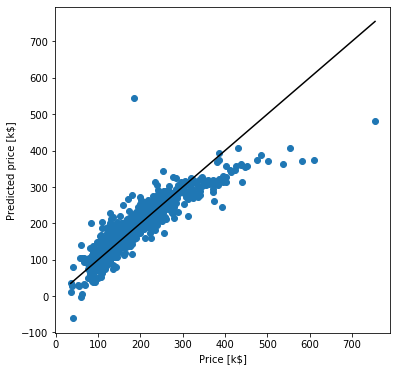

In [25]:
y_pred = f_lr_1(x)
plt.figure(figsize=(6,6));
axes = plt.gca()
plt.plot(y/1000, y_pred/1000, 'o');
plt.plot(np.linspace(min(y/1000),max(y/1000)),np.linspace(min(y/1000),max(y/1000)),'k')
plt.xlabel('Price [k$]')
plt.ylabel('Predicted price [k$]')
plt.show()

Sporządź wykres błędu predykcji od wartości dopasowanych

Text(0, 0.5, 'Prediciton error [k$]')

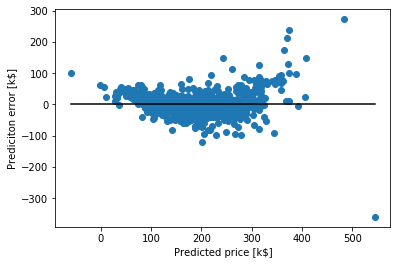

In [27]:
plt.plot(y_pred/1000,(y-y_pred)/1000 ,'o')
plt.plot(np.linspace(min(y_pred/1000),max(y_pred/1000)),np.zeros(50),'k')
plt.xlabel('Predicted price [k$]')
plt.ylabel('Prediciton error [k$]')

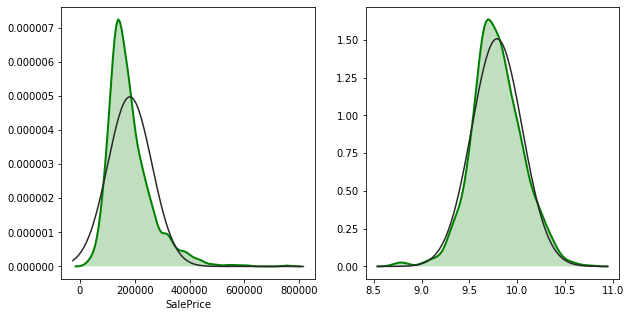

In [28]:
# transform training data & save lambda value 
from scipy.stats import norm
y1, fitted_lambda = stats.boxcox(y)
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2, figsize=[10,5]) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(y, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            color ="green", ax = ax[0],fit = norm) 
  
sns.distplot(y1, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            color ="green", ax = ax[1], fit = norm) 


Oblicz współczynniki dla modelu regresji wartości y1 oraz utwórz funkcję, która będzie wyliczała wartość y1 przy użyciu wyliczonch parametrów.

In [29]:
p2 = np.linalg.lstsq(M1, y1, rcond=None) # least-squares solution to a linear matrix equation

In [30]:
f_lr_2 = lambda x: np.sum(p2[0][1:]*x,axis=1)+p2[0][0]

Oblicz przewidziane wartości i sporządź wykres y_pred1 od y1 z uwzględniem prostej f(x)=x

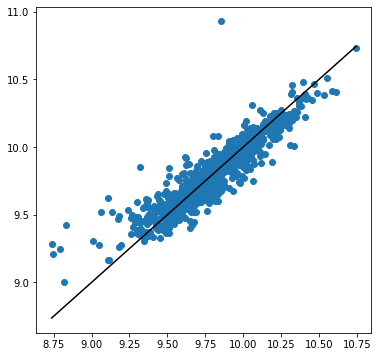

In [31]:
y_pred1 = f_lr_2(x)
plt.figure(figsize=(6,6));
axes = plt.gca()
plt.plot(y1, y_pred1, 'o');
plt.plot(np.linspace(min(y1),max(y1)),np.linspace(min(y1),max(y1)),'k')
plt.show()

Dokonujemy odwrotnej transformaty, aby otrzymac wartości cen w $

In [32]:
y_pred1 = scipy.special.inv_boxcox(y_pred1,fitted_lambda)

Sporządź wykres y_pred1 od y1 z uwzględniem prostej f(x)=x

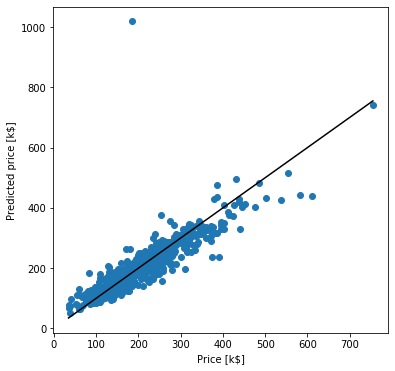

In [33]:
plt.figure(figsize=(6,6));
axes = plt.gca()
plt.plot(y/1000, y_pred1/1000, 'o');
plt.plot(np.linspace(min(y/1000),max(y/1000)),np.linspace(min(y/1000),max(y/1000)),'k')
plt.xlabel('Price [k$]')
plt.ylabel('Predicted price [k$]')
plt.show()

Sporządź wykres błędu predykcji od wartości dopasowanych

Text(0, 0.5, 'Prediciton error [k$]')

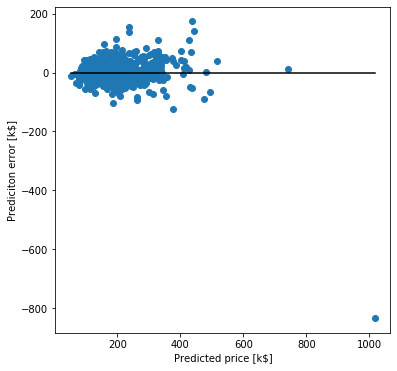

In [34]:
plt.figure(figsize=(6,6))
plt.plot(y_pred1/1000,(y-y_pred1)/1000 ,'o')
plt.plot(np.linspace(min(y_pred1/1000),max(y_pred1/1000)),np.zeros(50),'k')
plt.xlabel('Predicted price [k$]')
plt.ylabel('Prediciton error [k$]')

Policz błędy dla obu modeli:

- Mean Absolute Eroor
- Mean Squared Error
- Median Absolute Error

In [35]:
MAE1 = np.mean(np.abs(y-y_pred))
MAE2 = np.mean(np.abs(y-y_pred1))
MSE1 = np.mean((y-y_pred)**2)
MSE2 = np.mean((y-y_pred1)**2)
MedAE1 = np.median(np.abs(y-y_pred))
MedAE2 = np.median(np.abs(y-y_pred1))
print(MAE1)
print(MAE2)
print(MSE1)
print(MSE2)
print(MedAE1)
print(MedAE2)

23195.569783072442
19670.287542305618
1243475134.2516103
1439452510.5663373
16822.27945806342
12946.651915818082


In [36]:
from sklearn import  metrics
print("Mean absolute errors model 1: {}".format(metrics.mean_absolute_error(y, y_pred)))
print("Mean absolute errors model 2: {}".format(metrics.mean_absolute_error(y, y_pred1)))
print("Mean squared error model 1: {}".format( metrics.mean_squared_error(y, y_pred) ))
print("Mean squared error model 2: {}".format( metrics.mean_squared_error(y, y_pred1) ))
print("Median absolute error model 1: {}".format( metrics.median_absolute_error(y, y_pred) ))
print("Median absolute error model 2: {}".format( metrics.median_absolute_error(y, y_pred1) ))

Mean absolute errors model 1: 23195.569783072457
Mean absolute errors model 2: 19670.287542305658
Mean squared error model 1: 1243475134.2516117
Mean squared error model 2: 1439452510.5663364
Median absolute error model 1: 16822.27945806342
Median absolute error model 2: 12946.651915818082


In [25]:
final_data_test = data_test[cols]
final_data_test = final_data_test.fillna(0)
np.any(final_data_test.isnull())

False

In [26]:
x_test = np.array(final_data_test.iloc[:,1:])
y_test = final_data_test.iloc[:,0]

Oblicz wartości przewidziane przez model 1 dla danych testowych i sporządź wykres y_pred_test od y_test

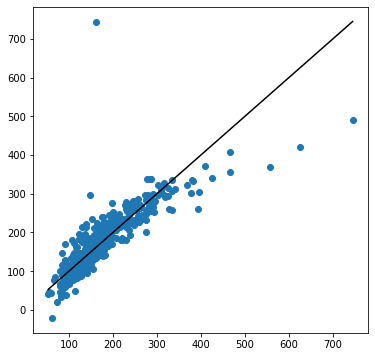

In [27]:
y_pred_test = f_lr_1(x_test)
plt.figure(figsize=(6,6));
axes = plt.gca()
plt.plot(y_test/1000, y_pred_test/1000, 'o');
plt.plot(np.linspace(min(y_test/1000),max(y_test/1000)),np.linspace(min(y_test/1000),max(y_test/1000)),'k')
plt.show()

Oblicz wartości przewidziane przez model 2 dla danych testowych i sporządź wykres y_pred_test od y_test

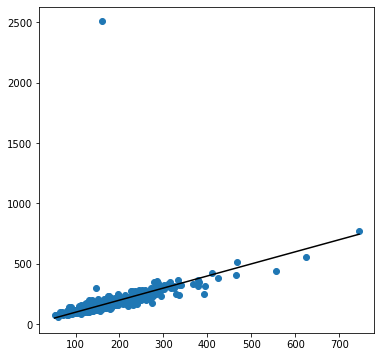

In [28]:
y_pred_test1 = f_lr_2(x_test)
y_pred_test1 = scipy.special.inv_boxcox(y_pred_test1,fitted_lambda)
plt.figure(figsize=(6,6));
axes = plt.gca()
plt.plot(y_test/1000, y_pred_test1/1000, 'o');
plt.plot(np.linspace(min(y_test/1000),max(y_test/1000)),np.linspace(min(y_test/1000),max(y_test/1000)),'k')
plt.show()

Policz błędy dla danych testowych dla obu modeli:

Mean Absolute Eroor
Mean Squared Error
Median Absolute Error

In [29]:
MAE1_test = np.mean(np.abs(y_test-y_pred_test))
MAE2_test = np.mean(np.abs(y_test-y_pred_test1))
MSE1_test = np.mean((y_test-y_pred_test)**2)
MSE2_test = np.mean((y_test-y_pred_test1)**2)
MedAE1_test = np.median(np.abs(y_test-y_pred_test))
MedAE2_test = np.median(np.abs(y_test-y_pred_test1))
print(MAE1_test)
print(MAE2_test)
print(MSE1_test)
print(MSE2_test)
print(MedAE1_test)
print(MedAE2_test)

25252.841568785923
24499.81581533441
1961975482.3511915
12703191023.740475
18280.161933664
14214.541004894607


D:\Programy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


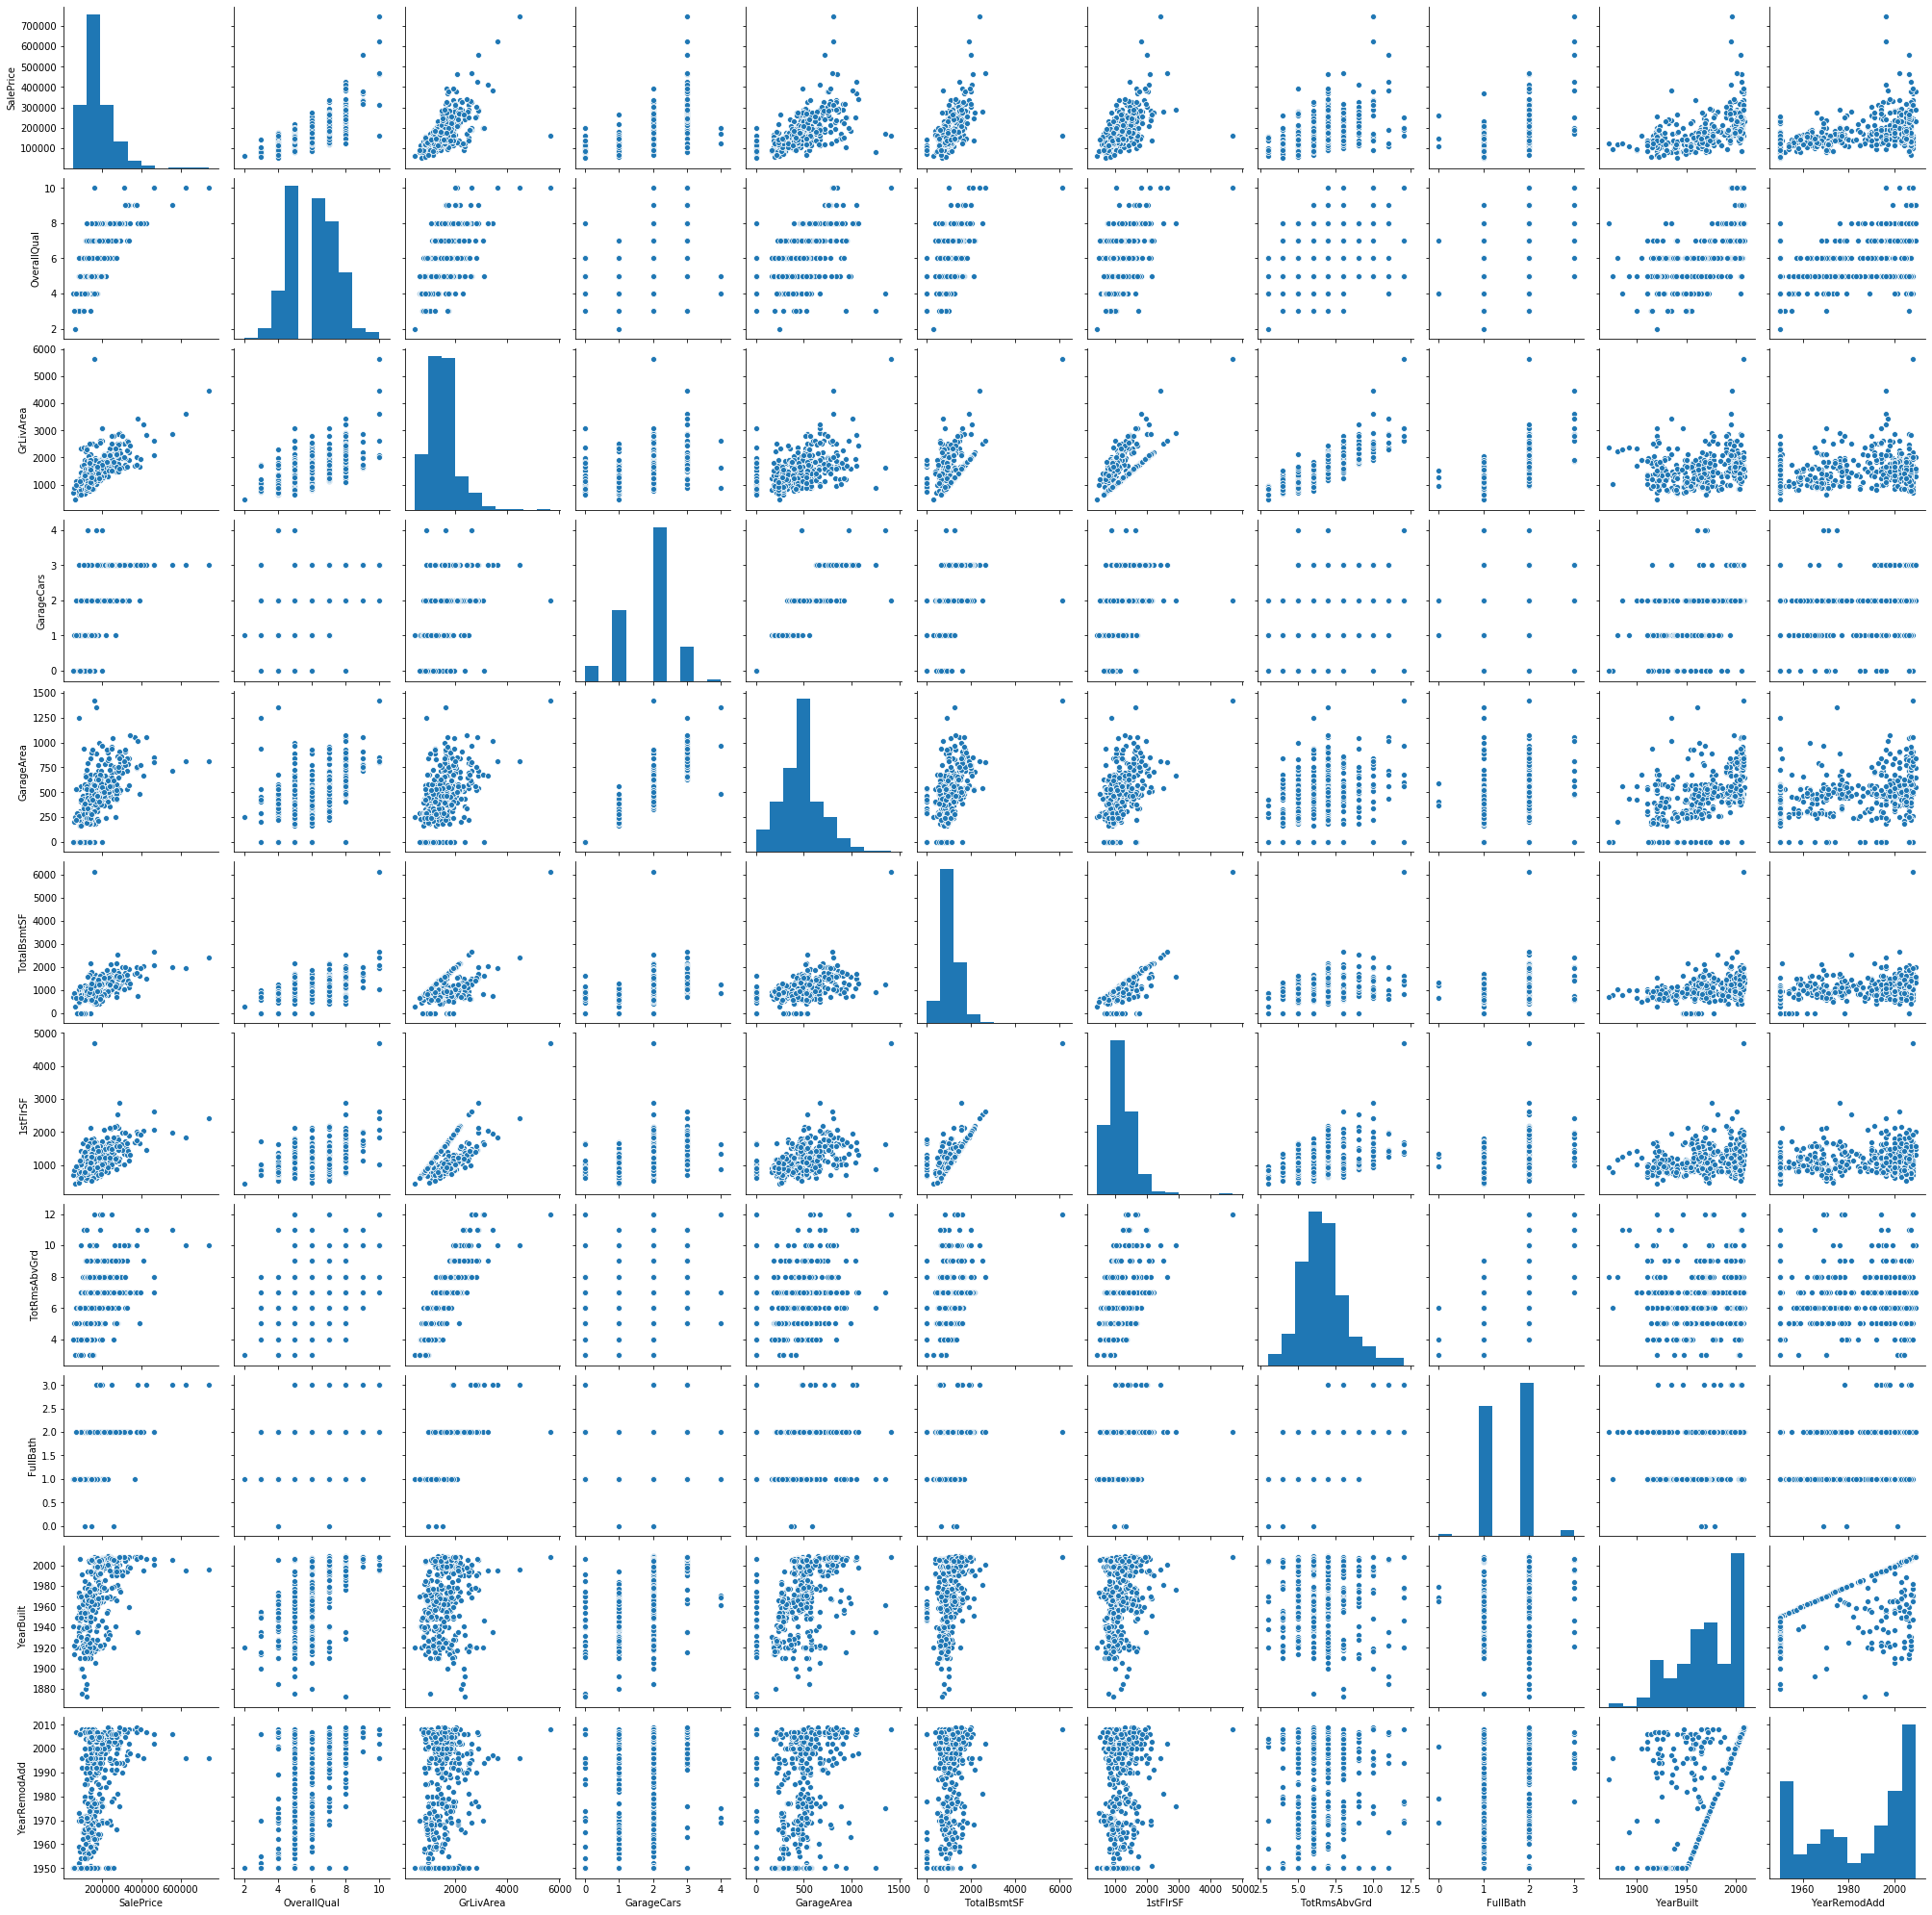

In [37]:
sns.pairplot(data_test[cols], size = 2.5)

In [30]:
print("Mean absolute errors model 1: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean absolute errors model 2: {}".format(metrics.mean_absolute_error(y_test, y_pred_test1)))
print("Mean squared error model 1: {}".format( metrics.mean_squared_error(y_test, y_pred_test) ))
print("Mean squared error model 2: {}".format( metrics.mean_squared_error(y_test, y_pred_test1) ))
print("Median absolute error model 1: {}".format( metrics.median_absolute_error(y_test, y_pred_test) ))
print("Median absolute error model 2: {}".format( metrics.median_absolute_error(y_test, y_pred_test1) ))

Mean absolute errors model 1: 25252.841568785938
Mean absolute errors model 2: 24499.815815334423
Mean squared error model 1: 1961975482.3511922
Mean squared error model 2: 12703191023.740458
Median absolute error model 1: 18280.161933664
Median absolute error model 2: 14214.541004894607
